Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0
Anomaly label(0-walk, 1-run.):  1.0


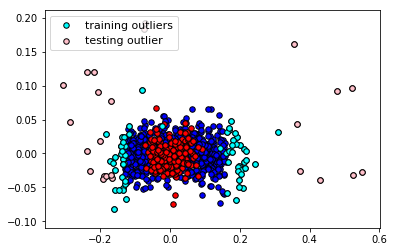

Error Train Precentage 8.47682119205298
Error Test Precentage 9.6


In [2]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA as sklearnPCA

#####################Random Generated Data########################
testLabels=np.zeros((120,1))
trainLabels=np.zeros((280,1))

x_ = np.linspace(-5, 5, 500)
xx, yy = np.meshgrid(x_, x_)

#Setting label "1" for all datapoints, that are normally distributed
labels_test=[1 for i in range(0,240)]
labels_train=[1 for i in range(0,560)]

#Creating Train_data
x=0.4*np.random.randn(280,2)
exampleTraindData=np.r_[x+2,x-2]

#Creating Test_data
x=0.2*np.random.randn(120,2)
exampleTestData=np.r_[x+2,x-2]

#Creating anomaly datapoints
anomaly_locat=[i for i in range(0,40)]
y=0.4*np.random.randn(40,2)
anomaly=np.r_[y+3.5,y-3.5]

for idx, val in enumerate(anomaly_locat):
    exampleTestData[int(val)]=anomaly[idx]#Replacing the normal test data with anomaly
    labels_test[int(val)]=2#Setting the label "2" for anomaly datapoint 

#################USING WALK or RUN  dataset##########################
TrainFile ="Train_data.csv"
TestFile ="Test_data.csv"

def openFile(filename):
    with open(filename, "r") as e:
        readerObj = csv.DictReader(e)
        count=0
        for sumRow in readerObj:
            count+=1
            
    size=count
    n_features=3

    ax=np.zeros((size,1))
    ay=np.zeros((size,1))
    az=np.zeros((size,1))
    gx=np.zeros((size,1))
    gy=np.zeros((size,1))
    gz=np.zeros((size,1)) 
    
    data=np.zeros((size,n_features))
    label=[]

    with open(filename, "r") as f:
        reader = csv.DictReader(f) 
        for idx,row in enumerate(reader):
            ax[idx]=[float(row["acceleration_x"])]
            ay[idx]=[float(row["acceleration_y"])]
            az[idx]=float(row["acceleration_z"])
            gx[idx]=[float(row["gyro_x"])]
            gy[idx]=[float(row["gyro_y"])]
            gz[idx]=[float(row["gyro_z"])]
            
            #,gx[idx],gy[idx],gz[idx]
            data[idx,:]=[ax[idx],ay[idx],az[idx]]
            
            label.append(float(row['activity']))

    return data, label,size

trainData, trainLabels,size1 = openFile(TrainFile)
testData, testLabels,size2 = openFile(TestFile)

############################PRINCIPAL COMPONENT ANALYSIS############################################
#Applying PCA on Train_Data
X_norm = (trainData - trainData.min())/(trainData.max() - trainData.min())
pca = sklearnPCA(n_components=3) #3-dimensional PCA
transformed_train = pca.fit_transform(X_norm)
#Applying PCA on Train_Data
X_norm = (testData - testData.min())/(testData.max() - testData.min())
pca = sklearnPCA(n_components=3) #3-dimensional PCA
transformed_test = pca.fit_transform(X_norm)
##########################################################################################

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001)
clf.fit(transformed_train)

#Detecting the outliers of the from the datapoints
y_pred_train = clf.predict(transformed_train)
y_pred_test = clf.predict(transformed_test)

#Counting the amount of outliers in train and test data
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


#Plot the data points
s = 30
b1 = plt.scatter(transformed_train[:, 0], transformed_train[:, 2], c='blue', s=s, edgecolors='k')
b2 = plt.scatter(transformed_test[:, 0], transformed_test[:, 2], c='red', s=s,edgecolors='k')

#Replace the data point colour if its classified to be the outlier
for i,v in enumerate (y_pred_train):
    if v==-1:
        b1 = plt.scatter(transformed_train[i, 0], transformed_train[i, 2], c='cyan', s=s, edgecolors='k')

for i,v in enumerate (y_pred_test):
    if v==-1:
        b2 = plt.scatter(transformed_test[i, 0], transformed_test[i, 2], c='pink', s=s,edgecolors='k')
        print("Anomaly label(0-walk, 1-run.): ",testLabels[i])



plt.axis('tight')

plt.legend([ b1, b2],[ "training outliers","testing outlier"],loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

plt.show()

#Calculating the error percentage
print ("Error Train Precentage",(n_error_train/size1)*100)
print ("Error Test Precentage",(n_error_test/size2)*100)